In [8]:
pip install yfinance

In [61]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta




In [65]:
# Define tickers and time period (last 5 years)
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365*5)).strftime("%Y-%m-%d")


In [66]:
data = yf.download(tickers, start=start_date, end=end_date, progress=False)


/tmp/ipython-input-4081252615.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date, progress=False)


In [67]:
print("Start Date:", start_date)
print("End Date:", end_date)
print(data.tail())

Start Date: 2020-09-02
End Date: 2025-09-01
Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA   
Date                                                                     
2025-08-25  227.160004  227.940002  208.490005  504.260010  346.600006   
2025-08-26  229.309998  228.710007  207.139999  502.040009  351.670013   
2025-08-27  230.490005  229.119995  207.479996  506.739990  349.600006   
2025-08-28  232.559998  231.600006  211.639999  509.640015  345.980011   
2025-08-29  232.139999  229.000000  212.910004  506.690002  333.869995   

Price             High                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA  ...   
Date                                                                    ...   
2025-08-25  229.300003  229.600006  210.520004  508.190002  349.529999  ...   
2025-08-26  229.490005  229.000000  207.850006 

In [68]:
# reset index to bring Date into the columns for the melt function
data = data.reset_index()

In [69]:
print(data.head())

Price        Date       Close                                                 \
Ticker                   AAPL        AMZN      GOOGL        MSFT        TSLA   
0      2020-09-02  127.815102  176.572495  85.357582  222.111908  149.123337   
1      2020-09-03  117.582115  168.399994  80.989777  208.352783  135.666672   
2      2020-09-04  117.659958  164.731003  78.589180  205.428391  139.440002   
3      2020-09-08  109.742012  157.492004  75.725853  194.315552  110.070000   
4      2020-09-09  114.119247  163.430496  76.900307  202.590195  122.093330   

Price         High                                     ...        Open  \
Ticker        AAPL        AMZN      GOOGL        MSFT  ...        AAPL   
0       134.215586  177.612503  85.790487  223.272093  ...  133.836227   
1       125.324947  174.420502  84.493263  219.868272  ...  123.447609   
2       120.325203  169.074997  81.262145  209.369164  ...  116.794240   
3       115.743679  162.542496  77.313826  201.382090  ...  110.84118

In [70]:
print(data.columns)



MultiIndex([(  'Date',      ''),
            ( 'Close',  'AAPL'),
            ( 'Close',  'AMZN'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'MSFT'),
            ( 'Close',  'TSLA'),
            (  'High',  'AAPL'),
            (  'High',  'AMZN'),
            (  'High', 'GOOGL'),
            (  'High',  'MSFT'),
            (  'High',  'TSLA'),
            (   'Low',  'AAPL'),
            (   'Low',  'AMZN'),
            (   'Low', 'GOOGL'),
            (   'Low',  'MSFT'),
            (   'Low',  'TSLA'),
            (  'Open',  'AAPL'),
            (  'Open',  'AMZN'),
            (  'Open', 'GOOGL'),
            (  'Open',  'MSFT'),
            (  'Open',  'TSLA'),
            ('Volume',  'AAPL'),
            ('Volume',  'AMZN'),
            ('Volume', 'GOOGL'),
            ('Volume',  'MSFT'),
            ('Volume',  'TSLA')],
           names=['Price', 'Ticker'])


In [71]:
# flatten columns: join first and second level
data.columns = [col[0] if col[1]=='' else f"{col[0]}_{col[1]}" for col in data.columns]

# now columns look like: ['index','Date','Close_AAPL','Close_AMZN',...]
print(data.columns)

# melt into long format
data_melted = data.melt(
    id_vars=['Date'],
    var_name='Attribute_Ticker',
    value_name='Value'
)

print(data_melted.head())

Index(['Date', 'Close_AAPL', 'Close_AMZN', 'Close_GOOGL', 'Close_MSFT',
       'Close_TSLA', 'High_AAPL', 'High_AMZN', 'High_GOOGL', 'High_MSFT',
       'High_TSLA', 'Low_AAPL', 'Low_AMZN', 'Low_GOOGL', 'Low_MSFT',
       'Low_TSLA', 'Open_AAPL', 'Open_AMZN', 'Open_GOOGL', 'Open_MSFT',
       'Open_TSLA', 'Volume_AAPL', 'Volume_AMZN', 'Volume_GOOGL',
       'Volume_MSFT', 'Volume_TSLA'],
      dtype='object')
        Date Attribute_Ticker       Value
0 2020-09-02       Close_AAPL  127.815102
1 2020-09-03       Close_AAPL  117.582115
2 2020-09-04       Close_AAPL  117.659958
3 2020-09-08       Close_AAPL  109.742012
4 2020-09-09       Close_AAPL  114.119247


In [72]:
# split combined column into Attribute + Ticker
data_melted[['Attribute','Ticker']] = data_melted['Attribute_Ticker'].str.split('_', expand=True)

# now pivot works
data_pivoted = data_melted.pivot_table(
    index=['Date','Ticker'],
    columns='Attribute',
    values='Value',
    aggfunc='first'
).reset_index()


In [73]:
# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()


In [77]:
print(stock_data.head())

Attribute  index       Date Ticker       Close        High         Low  \
0              0 2020-09-02   AAPL  127.815102  134.215586  123.535150   
1              1 2020-09-02   AMZN  176.572495  177.612503  174.334503   
2              2 2020-09-02  GOOGL   85.357582   85.790487   82.514632   
3              3 2020-09-02   MSFT  222.111908  223.272093  217.988970   
4              4 2020-09-02   TSLA  149.123337  159.679993  135.039993   

Attribute        Open       Volume  
0          133.836227  200119000.0  
1          177.350006   78630000.0  
2           82.903299   49522000.0  
3          218.583437   34080800.0  
4          159.663330  288528300.0  


In [79]:
print(stock_data.columns)



Index(['index', 'Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Attribute')


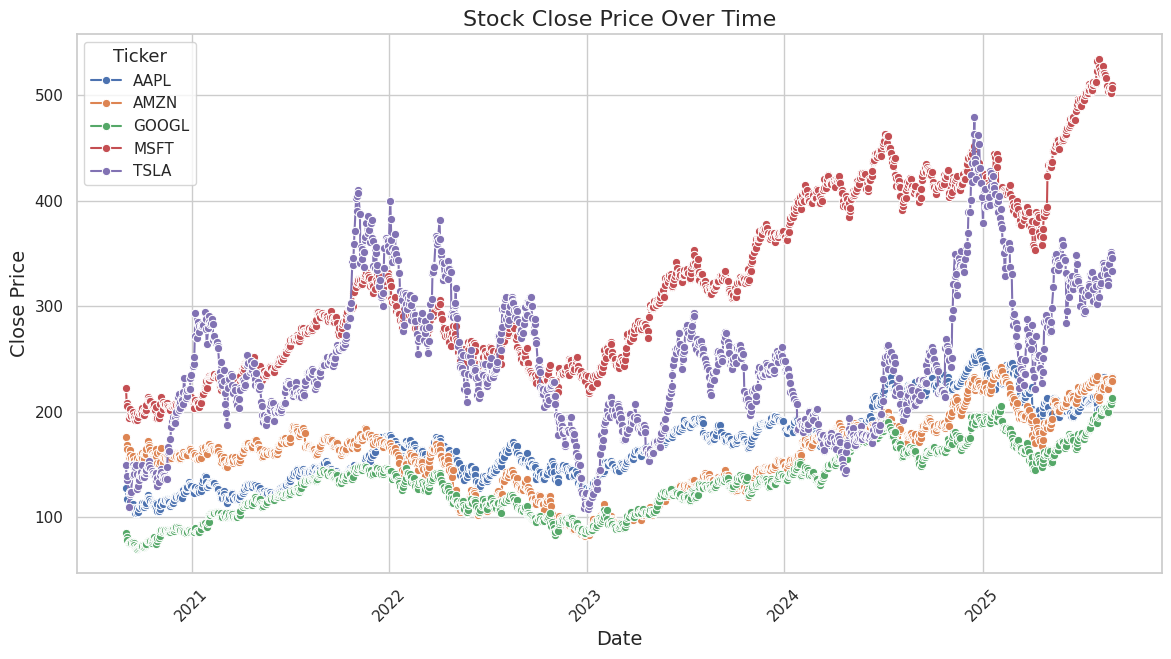

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# ensure Date is datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# optional: set index and reset it (not strictly needed for seaborn)
stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

# use Close instead of Adj Close
sns.lineplot(data=stock_data, x='Date', y='Close', hue='Ticker', marker='o')

plt.title('Stock Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize=13, fontsize=11)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


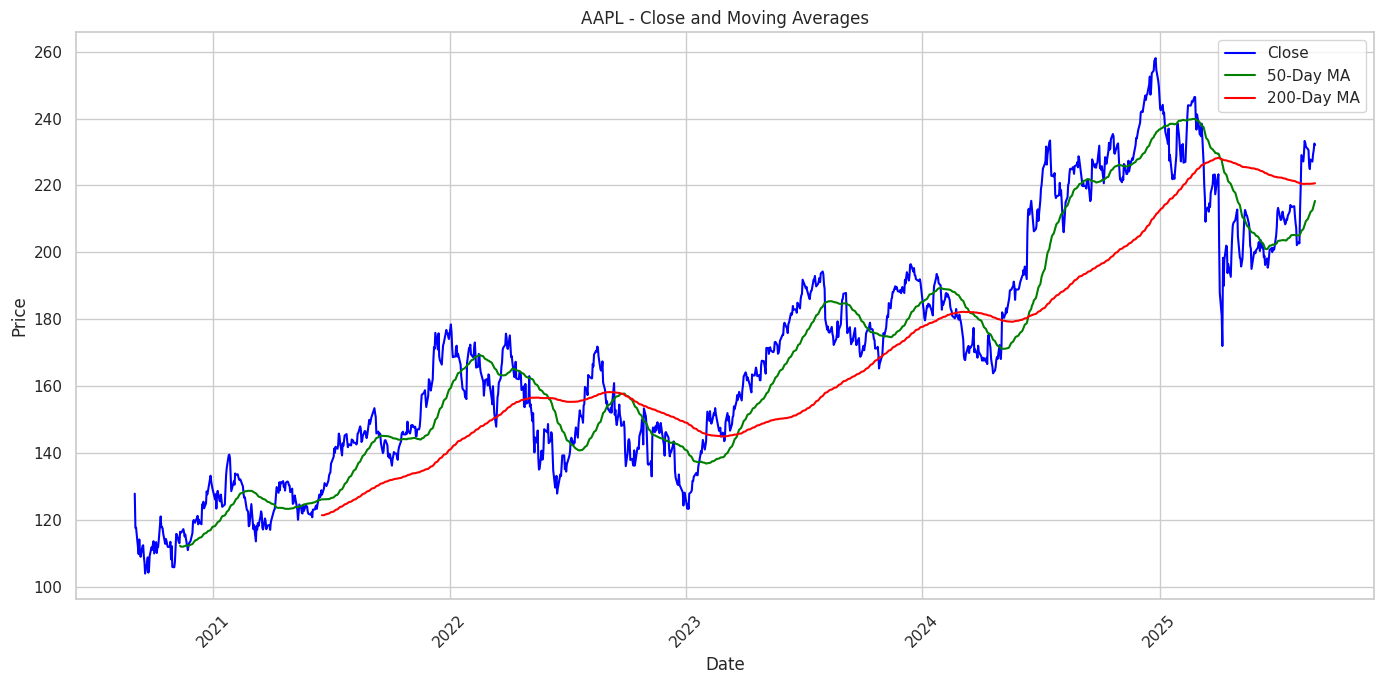

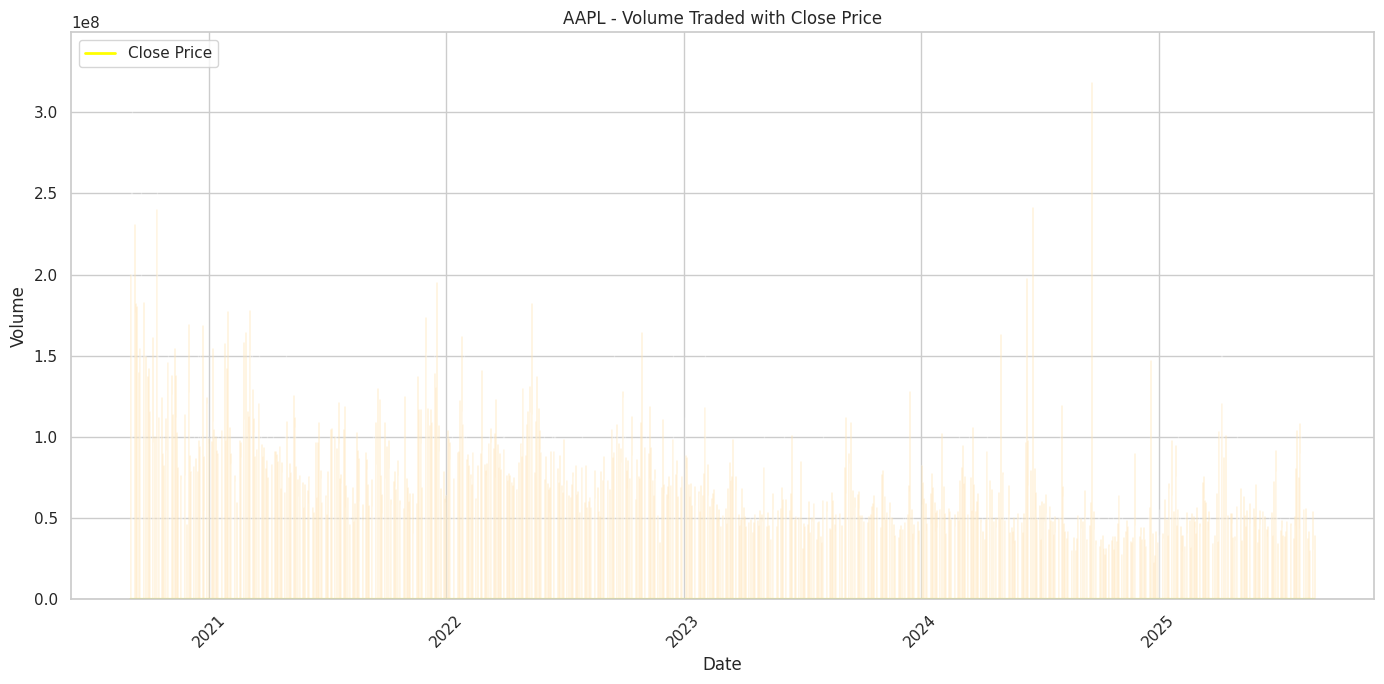

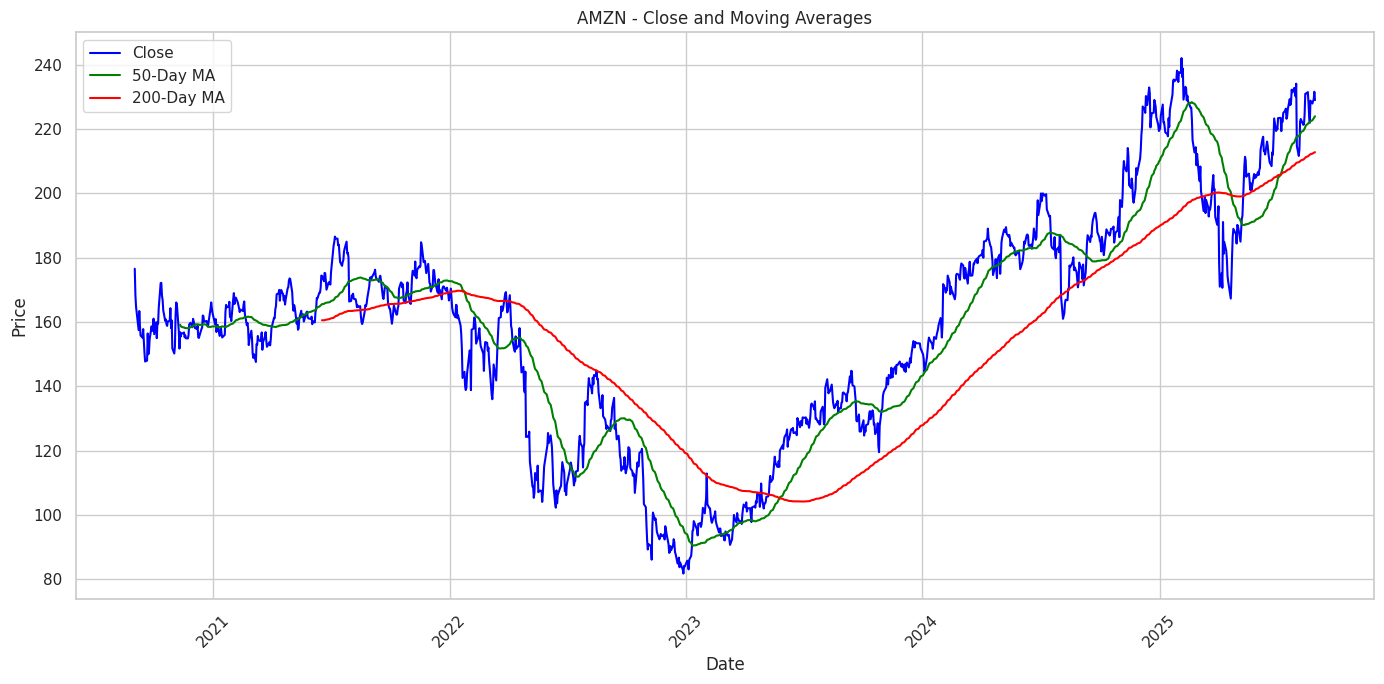

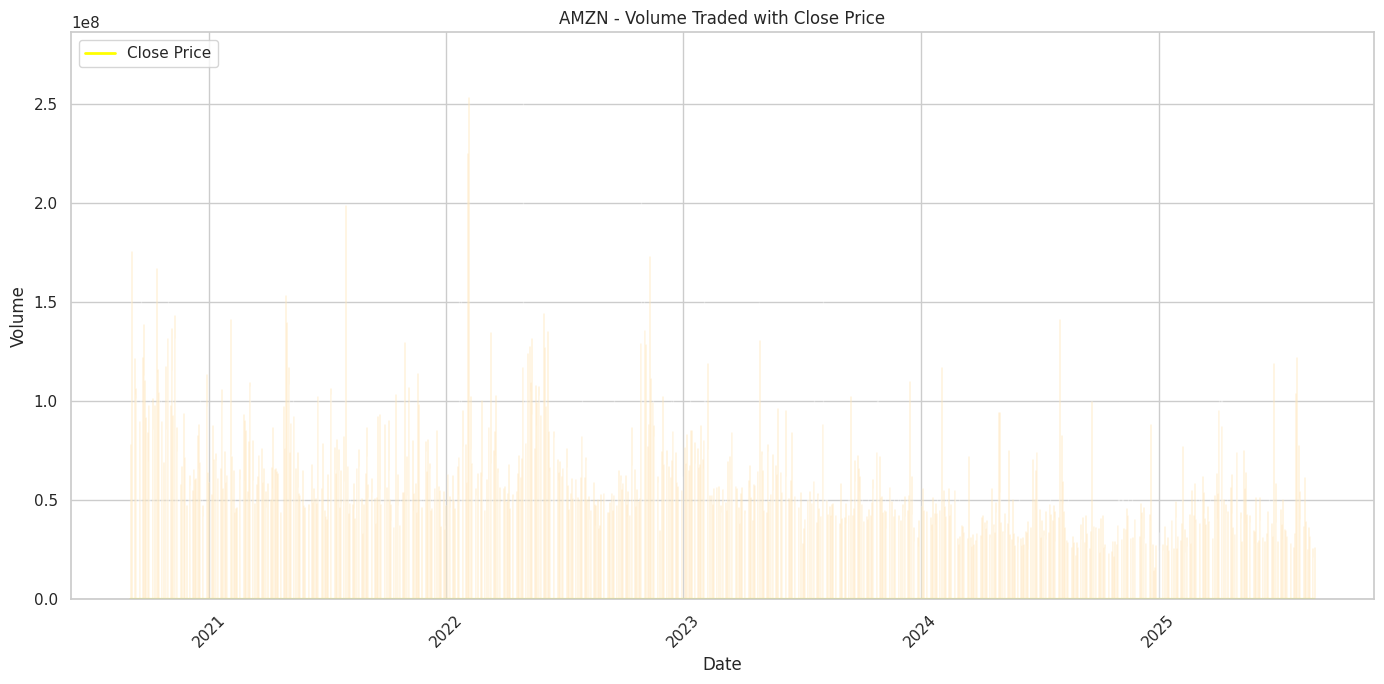

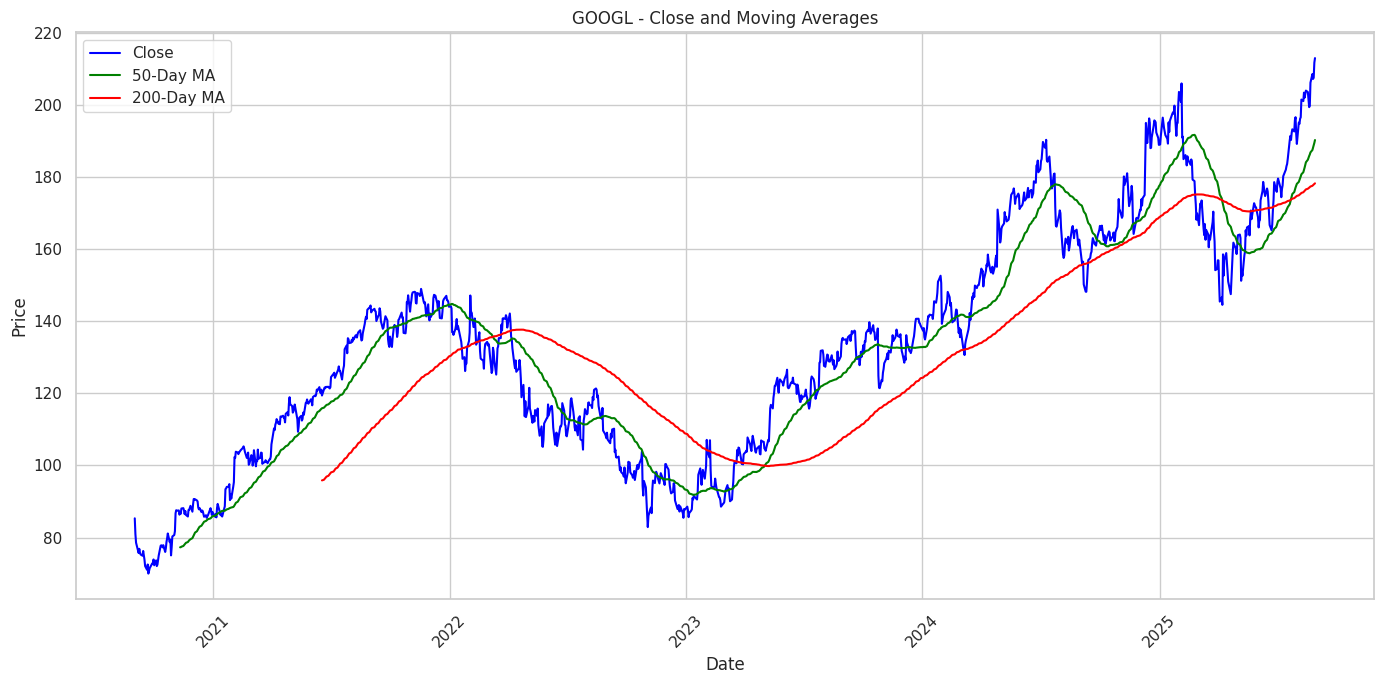

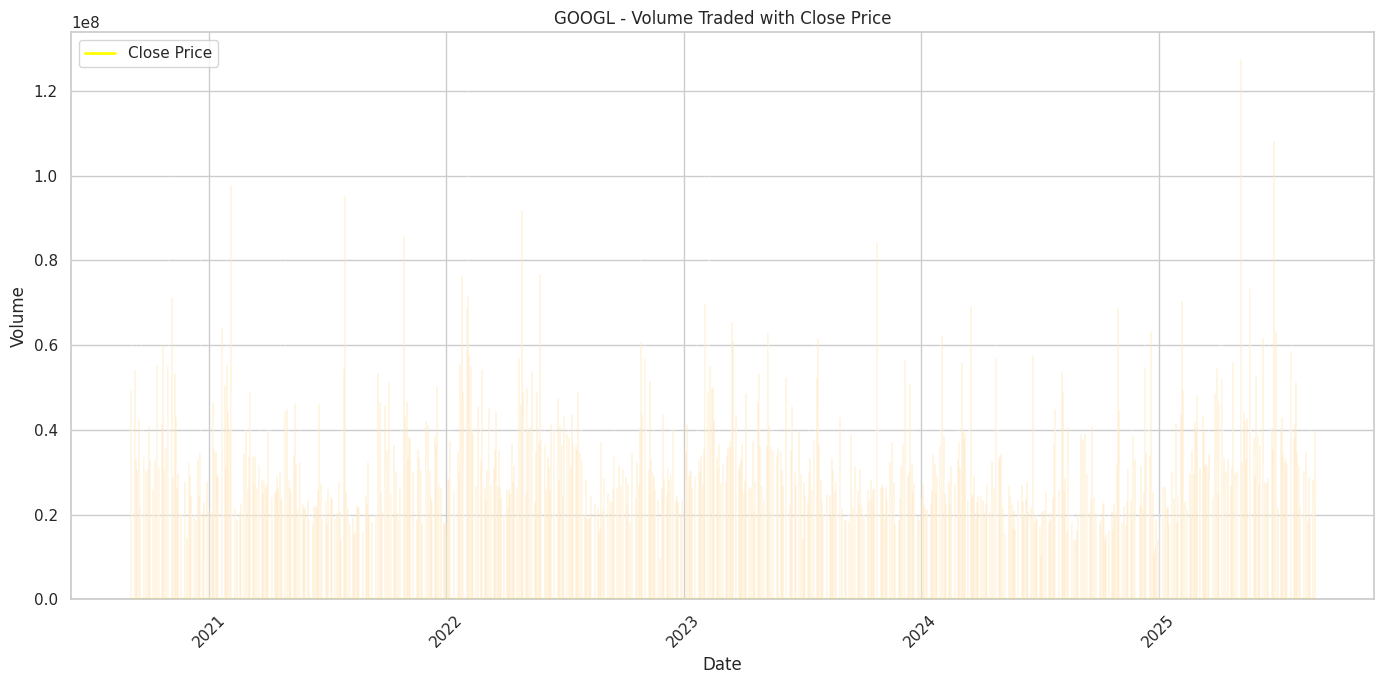

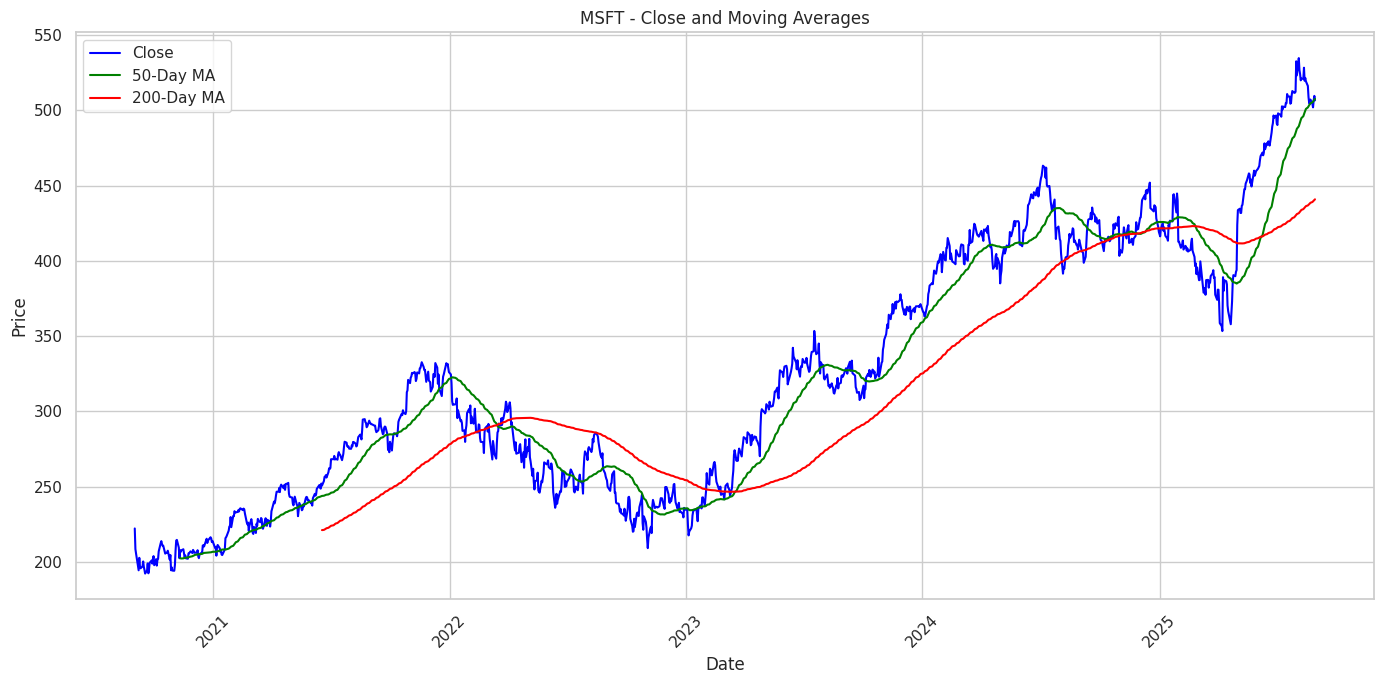

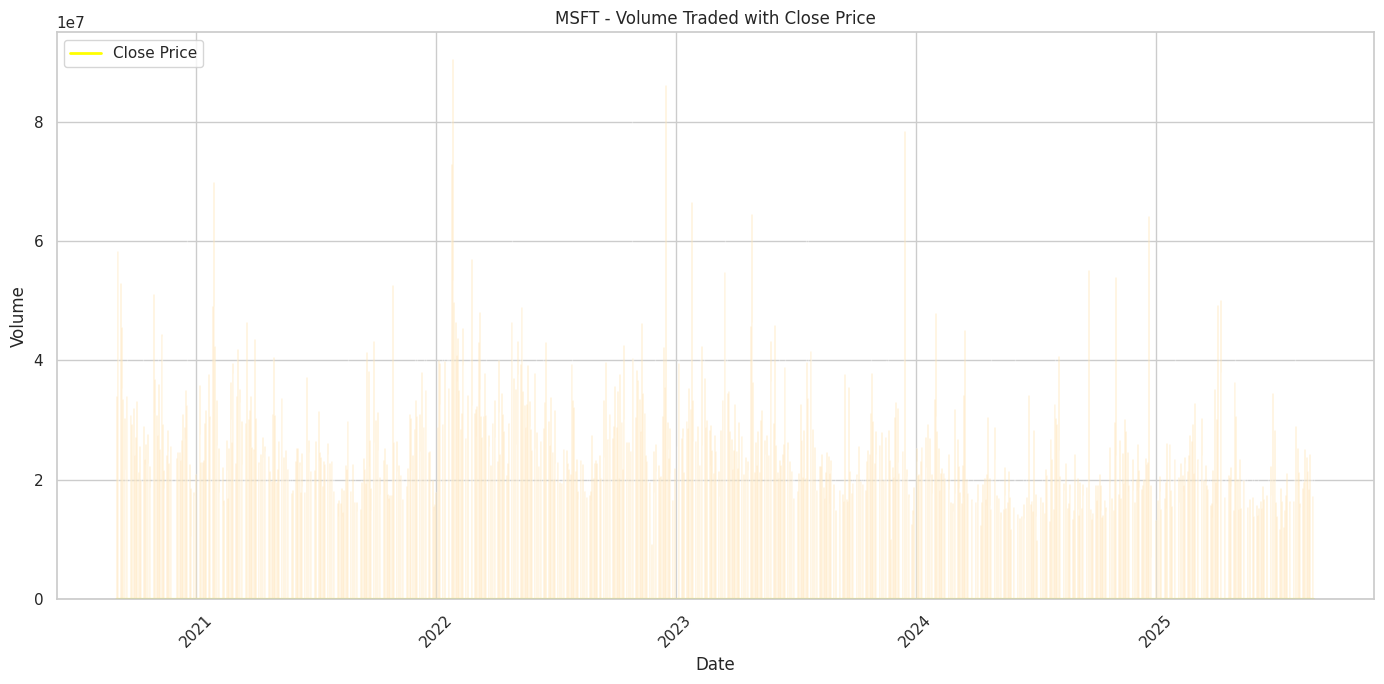

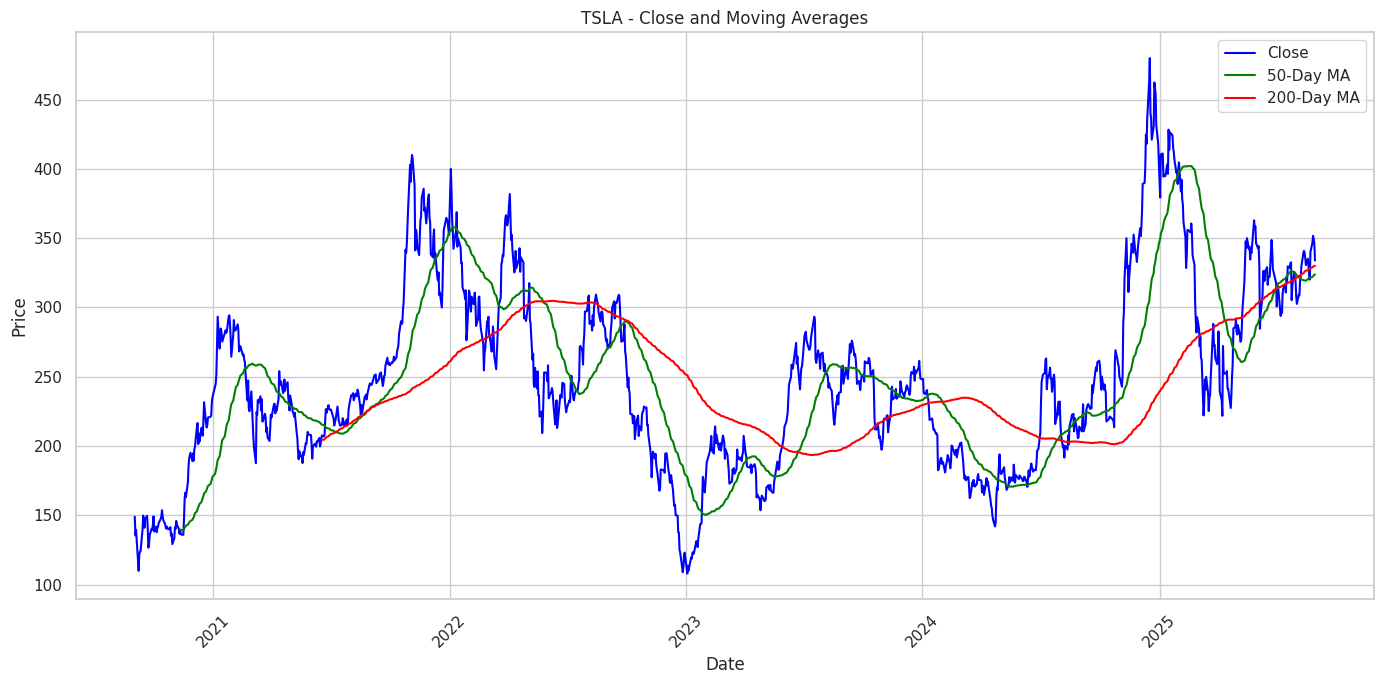

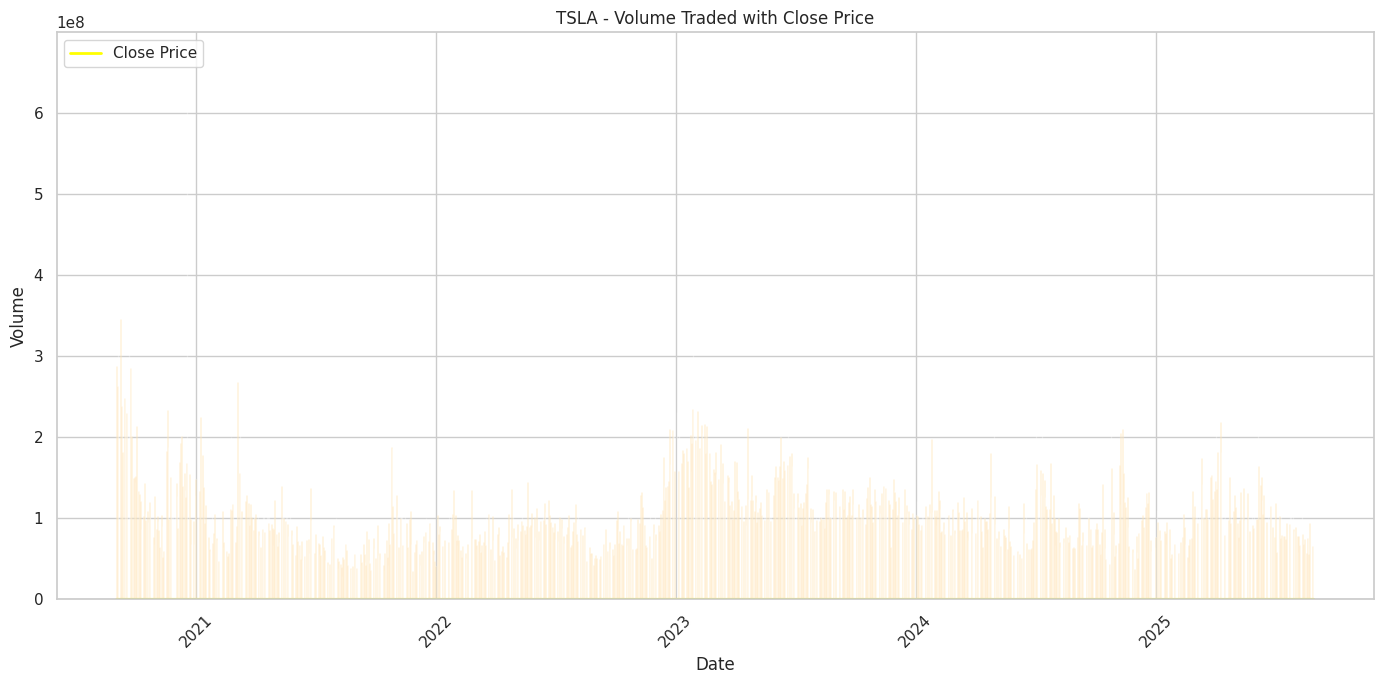

In [88]:
short_window = 50
long_window = 200

unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()

    # calculate moving averages on 'Close'
    ticker_data['50_MA'] = ticker_data['Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Close'].rolling(window=long_window).mean()

    #  Plot Close and moving averages
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Close'], label='Close', color='blue')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA', color='green')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA', color='red')
    plt.title(f'{ticker} - Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    #  Plot Volume with yellow Close line
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot Volume bars
    ax1.bar(ticker_data.index, ticker_data['Volume'], color='orange', alpha=0.3)
    ax1.set_ylabel('Volume')

    # Plot Close line on top
    ax1.plot(ticker_data.index, ticker_data['Close'], color='yellow', label='Close Price', linewidth=2)
    ax1.set_xlabel('Date')
    ax1.set_title(f'{ticker} - Volume Traded with Close Price')
    ax1.legend(loc='upper left')
    ax1.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



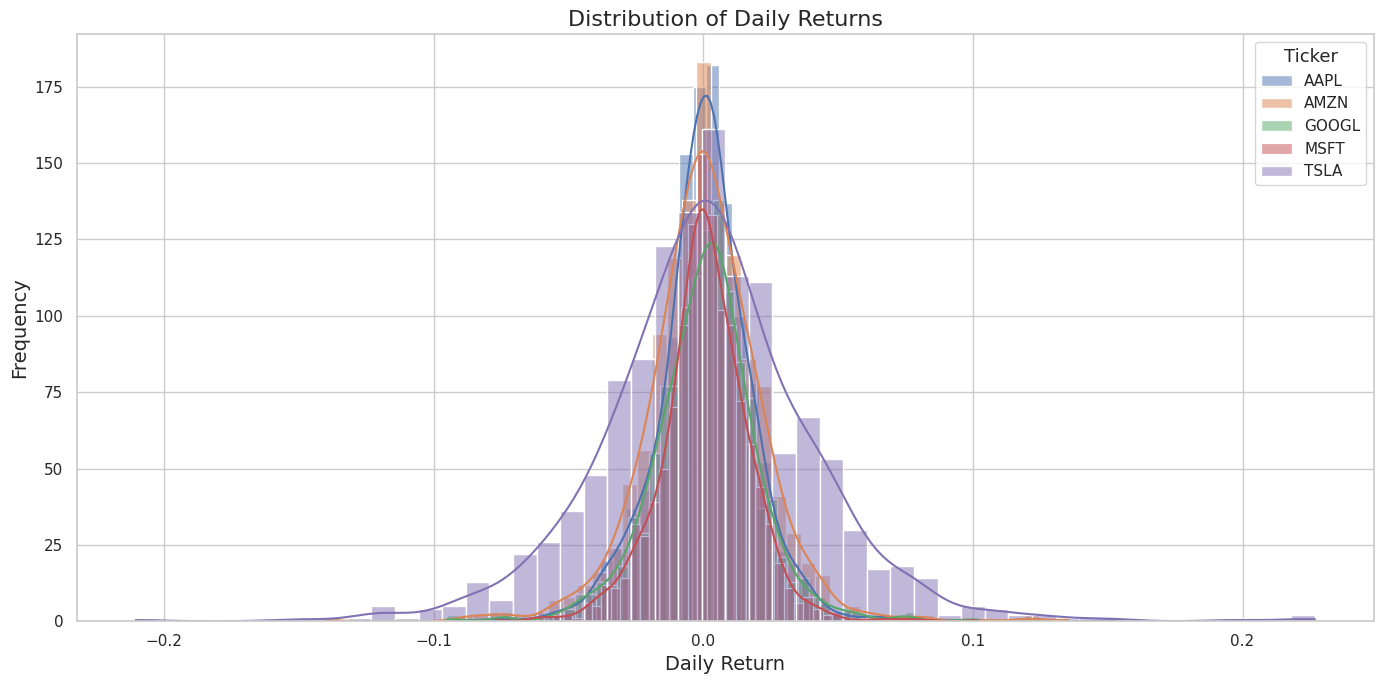

In [89]:
# Calculate daily returns using 'Close'
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

# Plot distribution of daily returns for each ticker
for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize=13, fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()


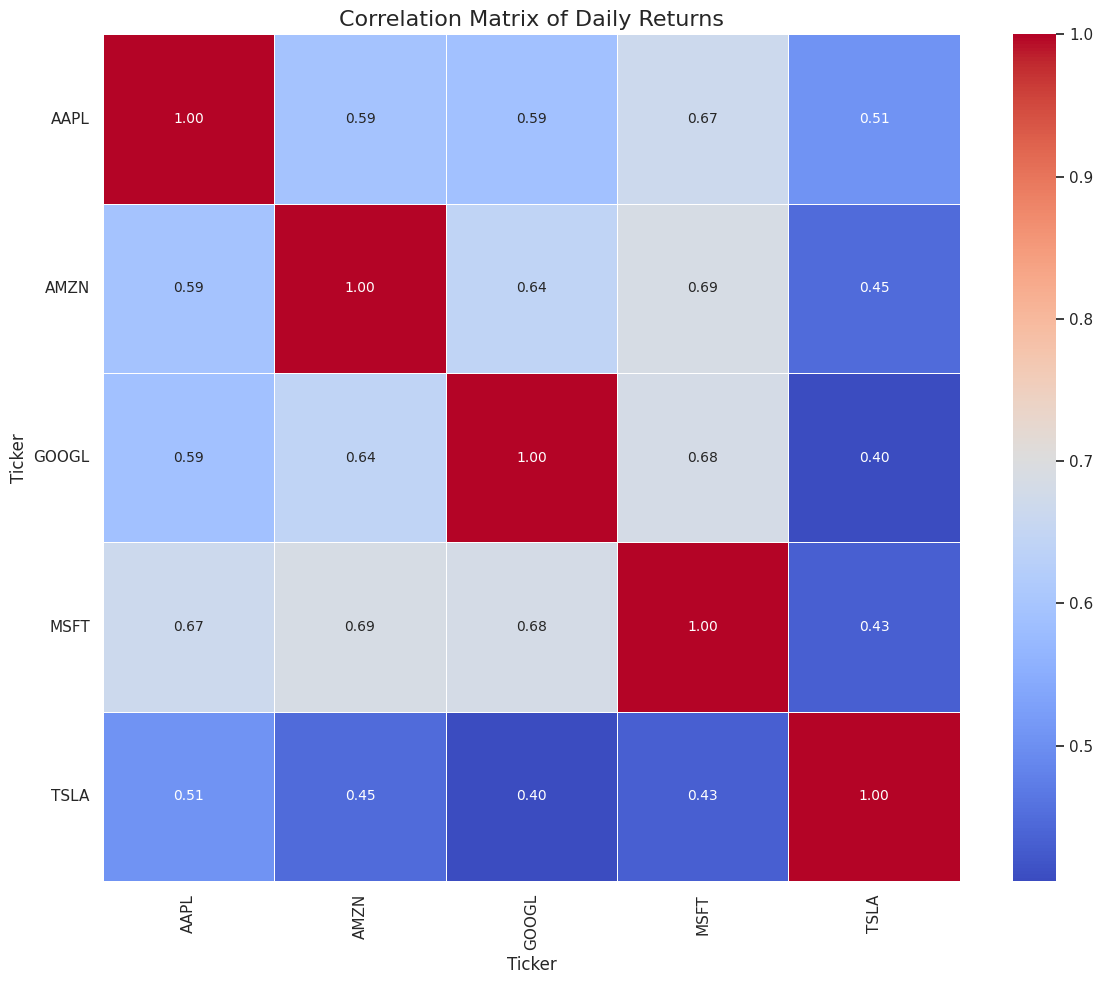

In [91]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [92]:
#Let’s calculate the expected returns and volatility for each stock:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
AAPL,0.162578,0.292235
AMZN,0.115028,0.354388
GOOGL,0.231885,0.309923
MSFT,0.200965,0.265049
TSLA,0.358278,0.627540
